In [1]:
import numpy as np
import torch
import pandas as pd
import torch.nn as nn
from sklearn.model_selection import train_test_split

import os
import sys
sys.path.append("/home/hugo/projetos-doutorado/mimo_emb_fts/src/")

from embfts.util.DataSetUtil import DataSetUtil
from embfts.util.StatisticsUtil import StatisticsUtil

In [2]:
data = pd.read_csv("/home/hugo/projetos-doutorado/mimo_emb_fts/data/energydata_complete.csv")
data.pop('date')
data.pop('rv1')
data.pop('rv2')
X=data.copy()
X.drop(data.tail(1).index,inplace=True)
X

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,18.200000,48.900000,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000
1,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,18.200000,48.863333,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000
2,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,18.200000,48.730000,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000
3,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,18.100000,48.590000,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000
4,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,18.100000,48.590000,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19729,90,0,25.533333,46.860000,25.978000,42.534000,27.323333,41.090000,24.700000,45.626667,...,24.666667,50.445000,23.200000,46.7450,22.866667,755.2,55.333333,3.166667,22.833333,13.366667
19730,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,24.700000,50.074000,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333
19731,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,24.700000,49.790000,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000
19732,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,24.700000,49.660000,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667


In [3]:
y=data.copy()
y.loc[max(y.index)+1, :] = None
y=y.shift(-1)
y.dropna(inplace=True)
y

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,60.0,30.0,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,18.2000,48.863333,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000
1,50.0,30.0,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,18.2000,48.730000,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000
2,50.0,40.0,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,18.1000,48.590000,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000
3,60.0,40.0,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,18.1000,48.590000,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000
4,50.0,40.0,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,45.730000,...,18.1000,48.590000,17.000000,45.2900,6.016667,734.0,92.000000,5.333333,43.833333,4.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19729,100.0,0.0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,24.7000,50.074000,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333
19730,90.0,0.0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,24.7000,49.790000,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000
19731,270.0,10.0,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,24.7000,49.660000,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667
19732,420.0,10.0,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,...,24.6625,49.518750,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333


In [13]:
data_set_util = DataSetUtil()
statistics = StatisticsUtil()

In [32]:
df = pd.read_csv('/home/hugo/projetos-doutorado/mimo_emb_fts/data/energydata_complete.csv', sep=',')
data = df.drop(labels=['date','rv1','rv2'], axis=1)
data_new = data_set_util.clean_dataset(data)
data_new = data_set_util.series_to_supervised_mimo(data_new, 1, 1)
data_new.head()

,Appliances(t-1),lights(t-1),T1(t-1),RH_1(t-1),T2(t-1),RH_2(t-1),T3(t-1),RH_3(t-1),T4(t-1),RH_4(t-1),...,T8(t),RH_8(t),T9(t),RH_9(t),T_out(t),Press_mm_hg(t),RH_out(t),Windspeed(t),Visibility(t),Tdewpoint(t)
1,60.0,30.0,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2
2,60.0,30.0,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1
3,50.0,30.0,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0
4,50.0,40.0,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9
5,60.0,40.0,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,18.1,48.590000,17.000000,45.29,6.016667,734.0,92.0,5.333333,43.833333,4.8


In [38]:
X = data_new.loc[:,'Appliances(t-1)':'Tdewpoint(t-1)']
y = data_new.loc[:,'Appliances(t)':'Tdewpoint(t)']

X = pd.DataFrame(X.values,columns=list(data.columns))
y = pd.DataFrame(y.values,columns=list(data.columns))

In [41]:
# data_train, data_test = train_test_split(data, test_size=0.25, shuffle=False)
# data_train, data_val = train_test_split(data_train, test_size=0.15, shuffle=False)
# train_loader = torch.utils.data.DataLoader(torch.tensor(data_train.astype(np.float32).values), batch_size=32)
# val_loader = torch.utils.data.DataLoader(torch.tensor(data_val.astype(np.float32).values), batch_size=32)

In [42]:
#train_loader.shape

In [43]:
# X = data.values
# data_train = data.loc[:,'Appliances(t-1)':'Tdewpoint(t-1)']
# data_test = data.loc[:,'Appliances(t)':'Tdewpoint(t)']

# train_loader = torch.utils.data.DataLoader(torch.tensor(data_train.astype(np.float32).values), batch_size=32)
# val_loader = torch.utils.data.DataLoader(torch.tensor(data_val.astype(np.float32).values), batch_size=32)

# train_df = data_set_util.sample_first_prows(data_train,0.75)
# train_val_df = data_set_util.sample_first_prows(data_test,0.75)

# test_df = data_train.iloc[max(train_df.index):]
# test_val_df = data_test.iloc[max(train_val_df.index):]


In [44]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# train = scaler.fit_transform(train_df)
# ytrain = scaler.fit_transform(train_val_df)
# test = scaler.transform(test_df)
# ytest = scaler.transform(test_val_df)

# train = train_df.values
# ytrain = train_val_df.values
# test = test_df.values
# ytest = test_val_df.values

In [45]:
# X_train = train
# X_test = test
# X_val = X_test[:int(len(X_train)*0.15)]
# train_loader = torch.utils.data.DataLoader(torch.tensor(X_train.astype(np.float32)), batch_size=32)
# val_loader = torch.utils.data.DataLoader(torch.tensor(X_val.astype(np.float32)), batch_size=32)

# y_train = ytrain 
# y_test = ytest
# y_val = y_train[:int(len(y_train)*0.15)] 



In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train, X_test = train_test_split(X, test_size=0.25, shuffle=False)
X_train, X_val = train_test_split(X_train, test_size=0.15, shuffle=False)
X_train = scaler.fit_transform(X_train.values)
X_val = scaler.fit_transform(X_val.values)
train_loader = torch.utils.data.DataLoader(torch.tensor(X_train.astype(np.float32)), batch_size=32)
val_loader = torch.utils.data.DataLoader(torch.tensor(X_val.astype(np.float32)), batch_size=32)

y_train, y_test = train_test_split(y, test_size=0.25, shuffle=False)
y_train, y_val = train_test_split(y_train, test_size=0.15, shuffle=False)
y_train = scaler.fit_transform(y_train.values)
y_val = scaler.fit_transform(y_val.values)

In [48]:
class MLP(nn.Module):
    def __init__(self, total_nlayers, n_input, n_output):
        super(MLP, self).__init__()
        self.layers = total_nlayers
        self.n_input = n_input
        self.n_output = n_output
        self.net = nn.ModuleList()
        for i,j in enumerate(range(1,self.layers+1)):
            if j != (self.layers):
                self.net.append(nn.Sequential(nn.Linear(n_input*j, n_input*(j+1)),
                                              nn.Dropout(0.8),
                                              nn.BatchNorm1d(n_input*(j+1)),
                                              nn.LeakyReLU(inplace=True)))
            else:
                self.net.append(nn.Sequential(nn.Linear(n_input*j, n_output)))


    def forward(self, x):
        for i in self.net:
            x = i(x)
        return x


In [83]:
torch.manual_seed(1)
model = MLP(2,X.shape[1], X.shape[1])
#if torch.cuda.is_available():
#    model = model.cuda()
#model = model.cuda()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
buffer = 10000

epochs = 100
model.train()
min_valid_loss=500
for epoch in range(epochs):
    aux,aux2=0,0
    train_loss=0.0
    for batch, d in enumerate(train_loader):
        #if torch.cuda.is_available():
        #    data =data.cuda()
        optimizer.zero_grad()  #set gradient to 0
        output = model(d.reshape(-1, d.shape[1]))  #make a prediction
        loss = criterion(output, torch.tensor(y_train[aux:aux+d.shape[0]].astype(np.float32)))  #calculate the loss
        loss.backward()  #differentiate loss with respect to parameters
        optimizer.step() #apply the method step and updates the parameters 
        train_loss += loss.item()
        aux+=d.shape[0]

    valid_loss = 0.0
    model.eval() 
    for dv in val_loader:    
        target = model(dv)
        val_loss = criterion(target,torch.tensor(y_val[aux2:aux2+dv.shape[0]].astype(np.float32)))
        valid_loss += val_loss.item()
        aux2+=dv.shape[0]
    print(f'Epoch {epoch+1} \t\t Training Loss: {train_loss / len(train_loader)} \t\t Validation Loss: {valid_loss / len(val_loader)}')
    if valid_loss < buffer:
        buffer = valid_loss

print (buffer/len(val_loader))   
    #if min_valid_loss > valid_loss:
     #   print(f'Validation Loss Decreased({min_valid_loss:.6f}--->{valid_loss:.6f})')
      #  min_valid_loss = valid_loss

Epoch 1 		 Training Loss: 0.032741264755681614 		 Validation Loss: 0.0632761400192976
Epoch 2 		 Training Loss: 0.02552972599594537 		 Validation Loss: 0.0761213562318257
Epoch 3 		 Training Loss: 0.024622306536155075 		 Validation Loss: 0.08225157356687955
Epoch 4 		 Training Loss: 0.022168476661657773 		 Validation Loss: 0.06806876127208983
Epoch 5 		 Training Loss: 0.02093590520142677 		 Validation Loss: 0.06783126563365971
Epoch 6 		 Training Loss: 0.020663755912768658 		 Validation Loss: 0.06338569175984178
Epoch 7 		 Training Loss: 0.01966743030571166 		 Validation Loss: 0.06134590187243053
Epoch 8 		 Training Loss: 0.01867679964223886 		 Validation Loss: 0.05593991907579558
Epoch 9 		 Training Loss: 0.01872198461309113 		 Validation Loss: 0.06349618708980935
Epoch 10 		 Training Loss: 0.017261930431716786 		 Validation Loss: 0.05686551947146654
Epoch 11 		 Training Loss: 0.016204509306179008 		 Validation Loss: 0.06217862447457654
Epoch 12 		 Training Loss: 0.01594178876154087 	

Epoch 95 		 Training Loss: 0.0023822916020417046 		 Validation Loss: 0.03714874160609075
Epoch 96 		 Training Loss: 0.0023509838292877505 		 Validation Loss: 0.04070247233446155
Epoch 97 		 Training Loss: 0.002367504550097392 		 Validation Loss: 0.05518297098044838
Epoch 98 		 Training Loss: 0.0022531481813414843 		 Validation Loss: 0.09811292123049498
Epoch 99 		 Training Loss: 0.0023000886681375002 		 Validation Loss: 0.020707977203918353
Epoch 100 		 Training Loss: 0.0027652432983841626 		 Validation Loss: 0.02815483067450779
0.01929687868271555


In [84]:
test_norm= torch.tensor(scaler.fit_transform(X_test.values.astype(np.float32)))
yhat=scaler.inverse_transform(model(test_norm).detach().numpy())[:,0]
y=scaler.inverse_transform(test_norm.detach().numpy())[:,0]

from pyFTS.benchmarks import Measures
Measures.rmse(y_test.values[:,0],yhat)


99.60211515337019

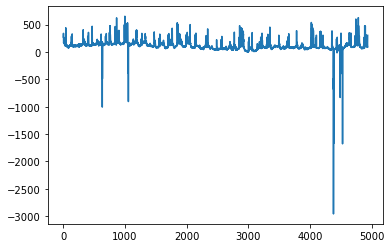

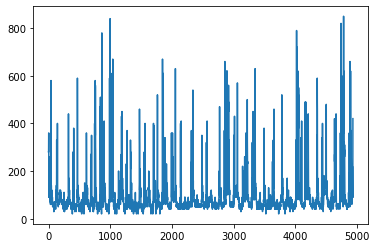

In [85]:
import matplotlib.pyplot as plt
plt.plot(yhat)
plt.show()
plt.plot (y)

In [86]:
model

MLP(
  (net): ModuleList(
    (0): Sequential(
      (0): Linear(in_features=26, out_features=52, bias=True)
      (1): Dropout(p=0.8, inplace=False)
      (2): BatchNorm1d(52, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): LeakyReLU(negative_slope=0.01, inplace=True)
    )
    (1): Sequential(
      (0): Linear(in_features=52, out_features=26, bias=True)
    )
  )
)

In [87]:
#test_norm= torch.tensor(data_test.values.astype(np.float32))
#yhat=model(test_norm).detach().numpy()[:,0]
#y=test_norm.detach().numpy()[:,0]

#from pyFTS.benchmarks import Measures
#Measures.rmse(y,yhat)


In [88]:
y

array([280., 280., 320., ...,  90., 270., 420.], dtype=float32)

In [89]:
yhat

array([272.59335, 275.58966, 308.08832, ...,  83.58642, 208.38889,
       302.2261 ], dtype=float32)

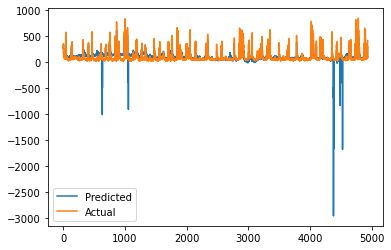

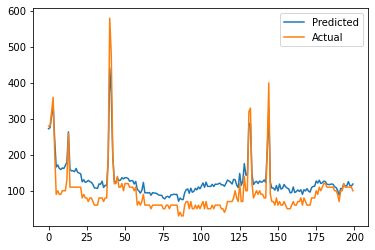

In [90]:
import matplotlib.pyplot as plt
plt.plot(yhat,label='Predicted')
plt.plot(y,label='Actual')
plt.legend()
plt.show()


plt.plot(yhat[0:200],label='Predicted')
plt.plot(y[0:200],label='Actual')
plt.legend()
plt.show()


Appliances
RMSE:  99.60211515337019
R2:  -0.2728731358647045
MAE:  55.06800381270893


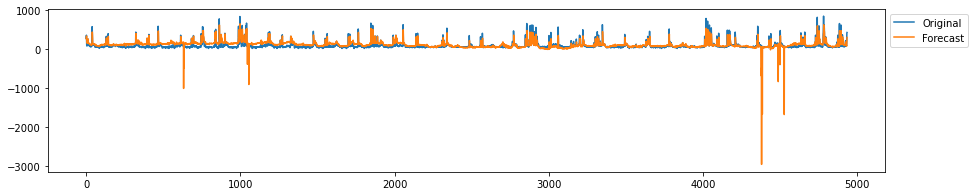

lights
RMSE:  4.3236664367602105
R2:  0.39348766938249347
MAE:  2.2567776949192444


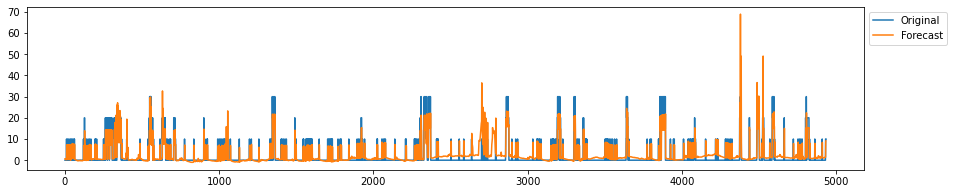

T1
RMSE:  0.6799660717750191
R2:  0.7807687607131457
MAE:  0.518767242912129


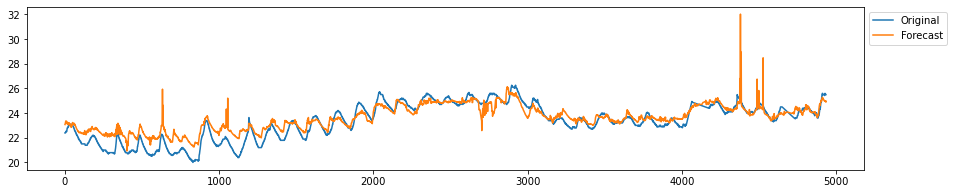

RH_1
RMSE:  4.056656380608034
R2:  0.3479513277795514
MAE:  3.7610571198810714


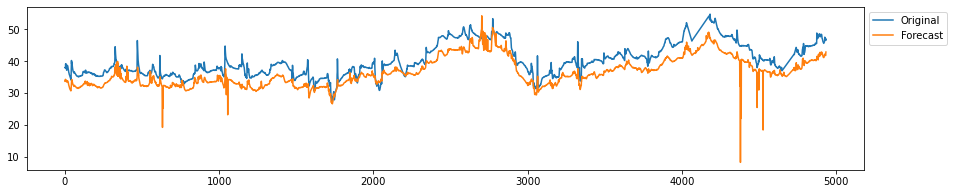

T2
RMSE:  1.626161227179989
R2:  0.5990941989455599
MAE:  0.7592936659310572


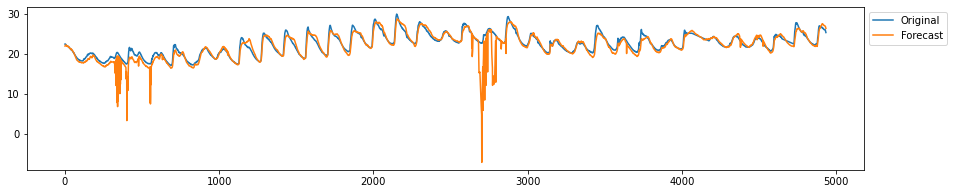

RH_2
RMSE:  5.574760126561589
R2:  -0.012106678262497006
MAE:  4.461203463685062


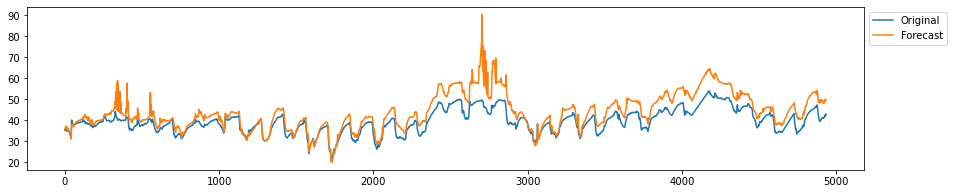

T3
RMSE:  1.1948183776500307
R2:  0.4913672500102413
MAE:  1.0629811114000252


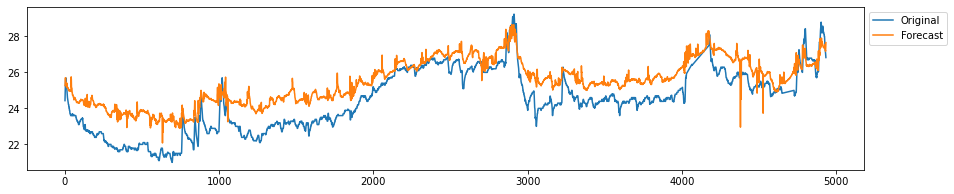

RH_3
RMSE:  1.6578172816709362
R2:  0.763688780857058
MAE:  1.2869781441920607


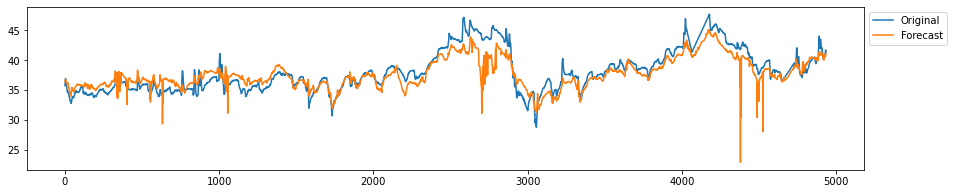

T4
RMSE:  0.5940853416699761
R2:  0.8820762829044517
MAE:  0.3619704328622812


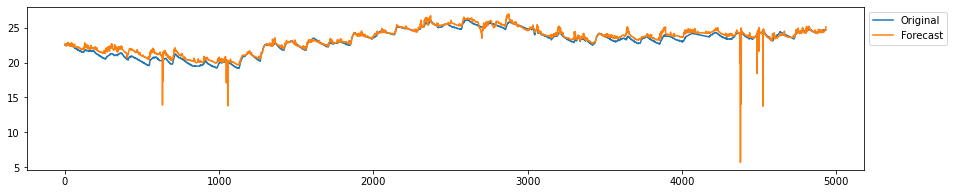

RH_4
RMSE:  1.6074195348745224
R2:  0.8773138597024247
MAE:  1.185355087272992


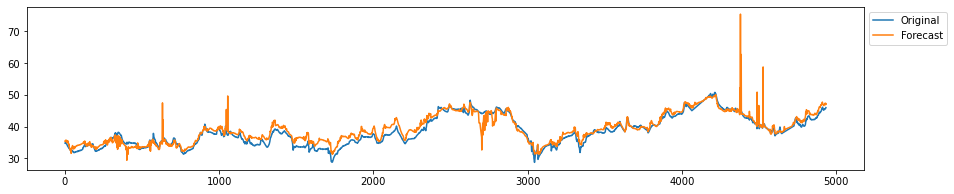

T5
RMSE:  0.870739828213339
R2:  0.7425622441235855
MAE:  0.6687614701197391


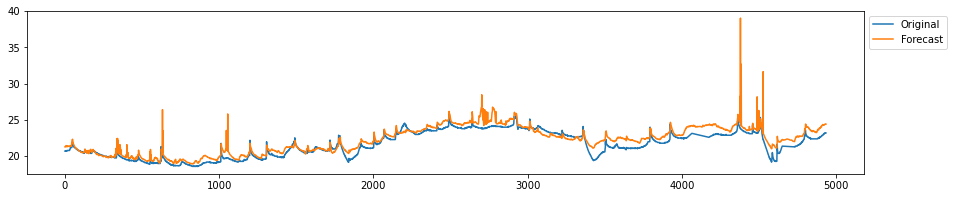

RH_5
RMSE:  3.498343368436377
R2:  0.8430175412090973
MAE:  2.004470883779138


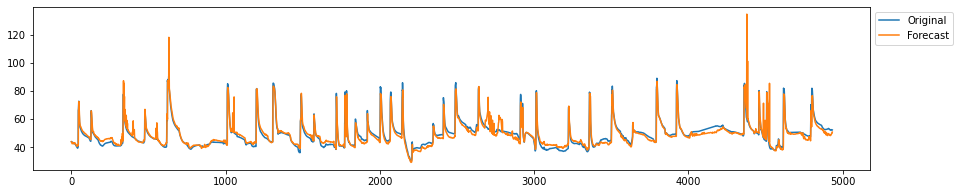

T6
RMSE:  1.921551892766096
R2:  0.9177594529914264
MAE:  1.494610338595071


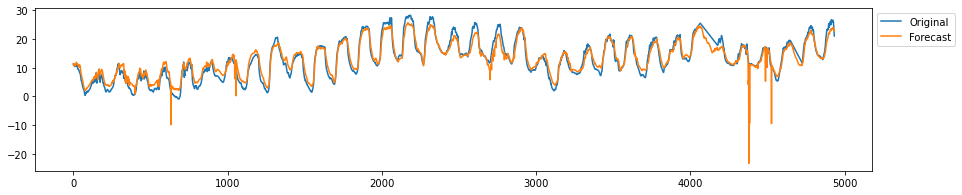

RH_6
RMSE:  9.15656610913419
R2:  0.803803054956878
MAE:  7.677488016352379


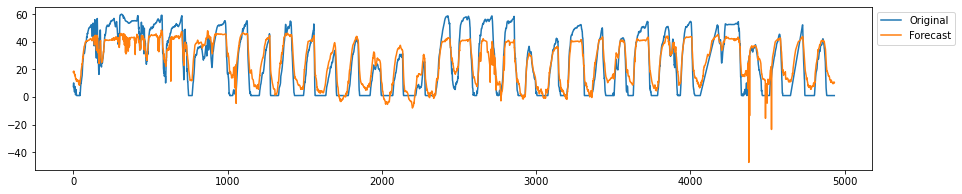

T7
RMSE:  0.5822118905307133
R2:  0.8950052936830732
MAE:  0.412013878688512


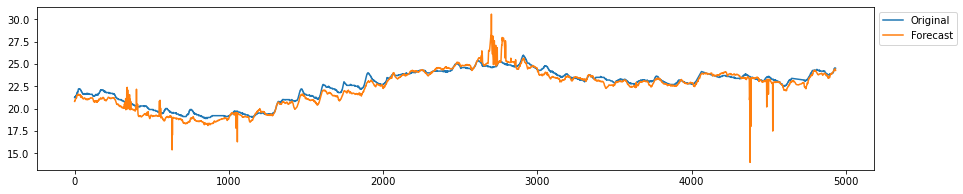

RH_7
RMSE:  1.467759363181933
R2:  0.9247153849291534
MAE:  1.109768907806613


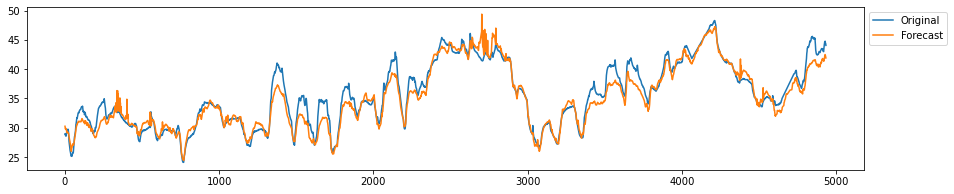

T8
RMSE:  0.7896423157429464
R2:  0.6662981459428134
MAE:  0.6696027145352278


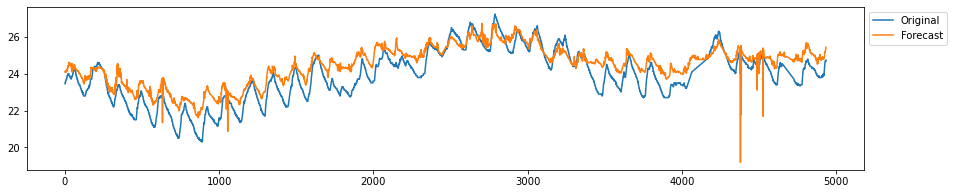

RH_8
RMSE:  2.6482916248827784
R2:  0.7298624444830788
MAE:  1.881702876782418


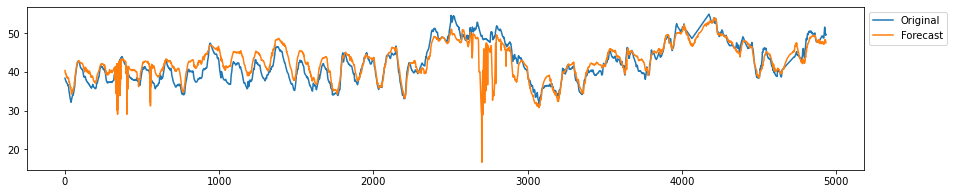

T9
RMSE:  0.808144655394807
R2:  0.7730151170813286
MAE:  0.6390048922950364


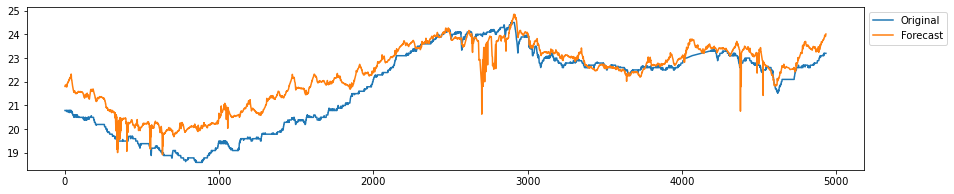

RH_9
RMSE:  0.973899266984639
R2:  0.9567924456052668
MAE:  0.754984017544322


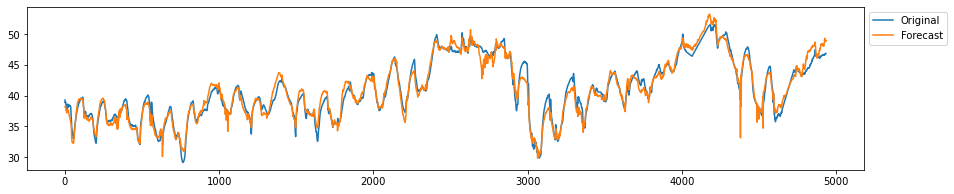

T_out
RMSE:  2.9323068906062986
R2:  0.7393323897196971
MAE:  2.0629469471046


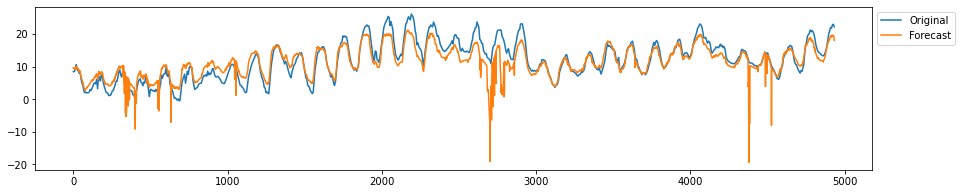

Press_mm_hg
RMSE:  7.594877726593018
R2:  -1.0524702086154303
MAE:  1.7582703532879729


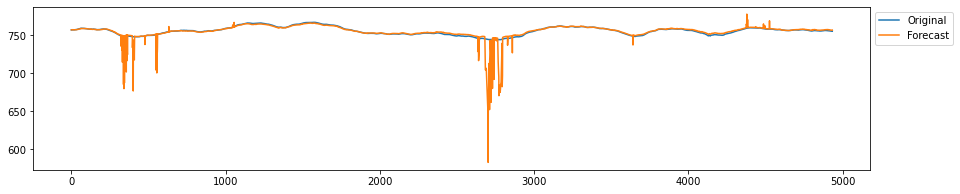

RH_out
RMSE:  5.3314470041193935
R2:  0.9148502300489444
MAE:  3.704660955175743


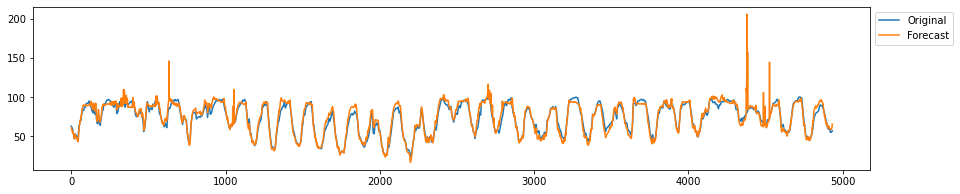

Windspeed
RMSE:  0.630565750004709
R2:  0.8665890733202801
MAE:  0.4999868226393339


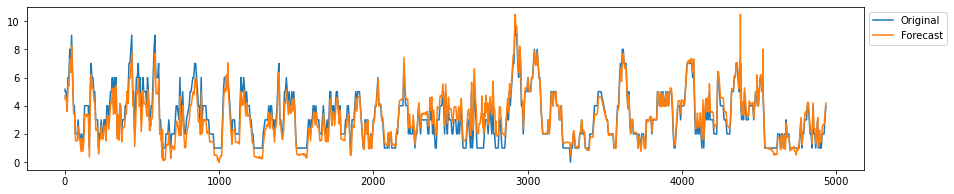

Visibility
RMSE:  4.8225953142747136
R2:  0.6873794859691271
MAE:  3.5926528317817823


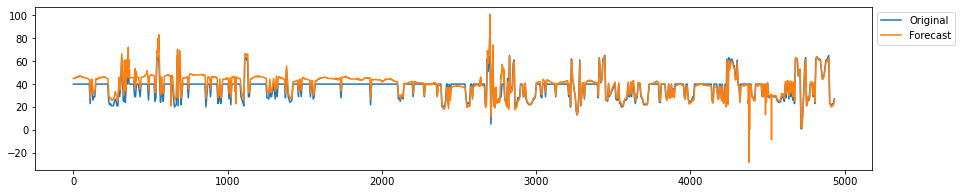

Tdewpoint
RMSE:  2.373712081423271
R2:  0.7237191028806136
MAE:  1.849577624277297


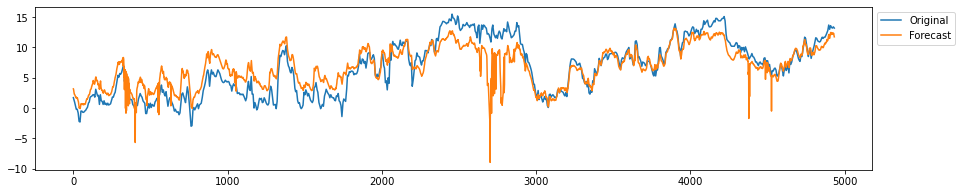

In [91]:
forecast_df = pd.DataFrame(scaler.inverse_transform(model(test_norm).detach().numpy()),columns=list(X_test.columns))

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
 
# original = original[:len(original)-1]
# forecast = forecast[1:]  

validation_df = y_test.copy()
    
for index,i in enumerate(validation_df.columns):
    print(i)
    
    original = validation_df[i].values
    forecast = forecast_df[i].values

    print("RMSE: ",mean_squared_error(original,forecast,squared=False),end="\n")
    print("R2: ",r2_score(original,forecast),end="\n")
    print("MAE: ",mean_absolute_error(original,forecast),end="\n")
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15, 3])
    ax.plot(original, label='Original')
    ax.plot(forecast, label='Forecast')
    handles, labels = ax.get_legend_handles_labels()
    lgd = ax.legend(handles, labels, loc=2, bbox_to_anchor=(1, 1))
    plt.show()

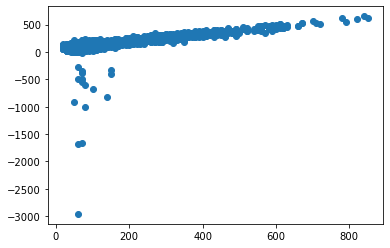

In [92]:
plt.scatter(y,yhat)

In [ ]:
data_train.shape

In [ ]:
from sklearn.linear_model import LinearRegression
a=np.linspace(0,len(data_train['Appliances'].values),len(data_train['Appliances'].values))

In [ ]:
reg = LinearRegression().fit(a.reshape(-1,1), data_train['Appliances'].values)

In [ ]:
a2=np.linspace(0,len(data_test['Appliances'].values),len(data_test['Appliances'].values))

In [ ]:
reg.score(a2.reshape(-1,1),data_test['Appliances'].values)

In [ ]:
reg.intercept_